In [1]:
pip install pandas numpy scikit-learn nltk streamlit PyPDF2


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [5]:
import pandas as pd

df = pd.read_csv(r'C:\Users\DELL\OneDrive\Desktop\UpdatedResumeDataSet.csv')
df.head()


,Category,Resume
0,Data Science,Skills * Programming Languages: Python (pandas...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...
2,Data Science,"Areas of Interest Deep Learning, Control Syste..."
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab..."


In [24]:
import re
import nltk
from nltk.corpus import stopwords

nltk.download('stopwords')

def clean_text(resume):
    resume = re.sub(r"http\S+|www\S+", '', resume)
    resume = re.sub(r"\S+@\S+", '', resume)
    resume = re.sub(r"[^A-Za-z\s]", '', resume)
    resume = re.sub(r"\s+", ' ', resume)
    resume = resume.lower()
    stop_words = set(stopwords.words('english'))
    words = resume.split()
    words = [word for word in words if word not in stop_words]
    return " ".join(words)

df['cleaned_resume'] = df['Resume'].apply(clean_text)
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(max_features=5000)
X = tfidf.fit_transform(df['cleaned_resume'])

# Save vectorizer
import pickle
with open('tfidf_vectorizer.pkl', 'wb') as f:
    pickle.dump(tfidf, f)


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [18]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(max_features=5000)
X = tfidf.fit_transform(df['cleaned_resume'])

# Save vectorizer
import pickle
with open('tfidf_vectorizer.pkl', 'wb') as f:
    pickle.dump(tfidf, f)


In [26]:
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVC
from sklearn.multiclass import OneVsRestClassifier

le = LabelEncoder()
y = le.fit_transform(df['Category'])

model = OneVsRestClassifier(SVC(kernel='linear', probability=True))
model.fit(X, y)

# Save the model
with open('clf.pkl', 'wb') as f:
    pickle.dump(model, f)

# Save the label encoder
with open('label_encoder.pkl', 'wb') as f:
    pickle.dump(le, f)


In [27]:
# Load vectorizer, classifier, and label encoder
with open('tfidf_vectorizer.pkl', 'rb') as f:
    loaded_tfidf = pickle.load(f)

with open('clf.pkl', 'rb') as f:
    loaded_clf = pickle.load(f)

with open('label_encoder.pkl', 'rb') as f:
    loaded_le = pickle.load(f)

# New resume
new_resume = "Experienced Python developer skilled in machine learning and data science."

# Clean new resume text
cleaned_new_resume = clean_text(new_resume)

# Transform new resume to vector
X_new = loaded_tfidf.transform([cleaned_new_resume])

# Predict category
pred_id = loaded_clf.predict(X_new)[0]
pred_label = loaded_le.inverse_transform([pred_id])[0]

print(f"Predicted category: {pred_label}")


Predicted category: Data Science


In [28]:
import os
print(os.getcwd())


C:\Users\DELL


In [30]:
# 0. Assume you have a DataFrame df with columns 'Resume' and 'Category'
X_test_raw = df['Resume'].tolist()
y_test = df['Category'].tolist()

# 1. Clean and vectorize test data
X_test_clean = [clean_text(text) for text in X_test_raw]
X_test_vec = loaded_tfidf.transform(X_test_clean)

# 2. Predict
y_pred = loaded_clf.predict(X_test_vec)

# 3. Encode y_test if needed
if not isinstance(y_test[0], int):
    y_test_enc = loaded_le.transform(y_test)
else:
    y_test_enc = y_test

# 4. Metrics
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

acc = accuracy_score(y_test_enc, y_pred)
print(f"Accuracy: {acc:.2f}")

cm = confusion_matrix(y_test_enc, y_pred)
print("Confusion Matrix:")
print(cm)

print("Classification Report:")
print(classification_report(y_test_enc, y_pred, target_names=loaded_le.classes_))


Accuracy: 1.00
Confusion Matrix:
[[20  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0 36  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0  0 26  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0  0  0 40  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0  0  0  0 28  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0  0  0  0  0 24  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0  0  0  0  0  0 40  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0  0  0  0  0  0  0 33  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0  0  0  0  0  0  0  0 55  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0  0  0  0  0  0  0  0  0 28  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0  0  0  0  0  0  0  0  0  0 40  0  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0  0  0  0  0  0  0  0  0  0  0 30  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0  0

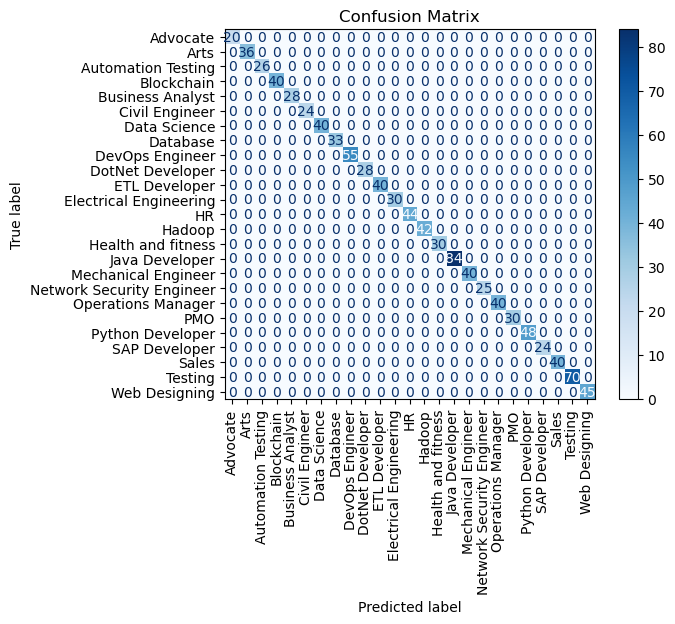

In [32]:
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# If you already have cm (the confusion matrix) and loaded_le.classes_ (the label names):
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=loaded_le.classes_)
disp.plot(cmap='Blues', xticks_rotation='vertical')
plt.title("Confusion Matrix")
plt.show()
